In [13]:
# Practice Computer Vision 

In [9]:
import matplotlib .pyplot as plt 
%config InlineBackend.figure_formats='retina'

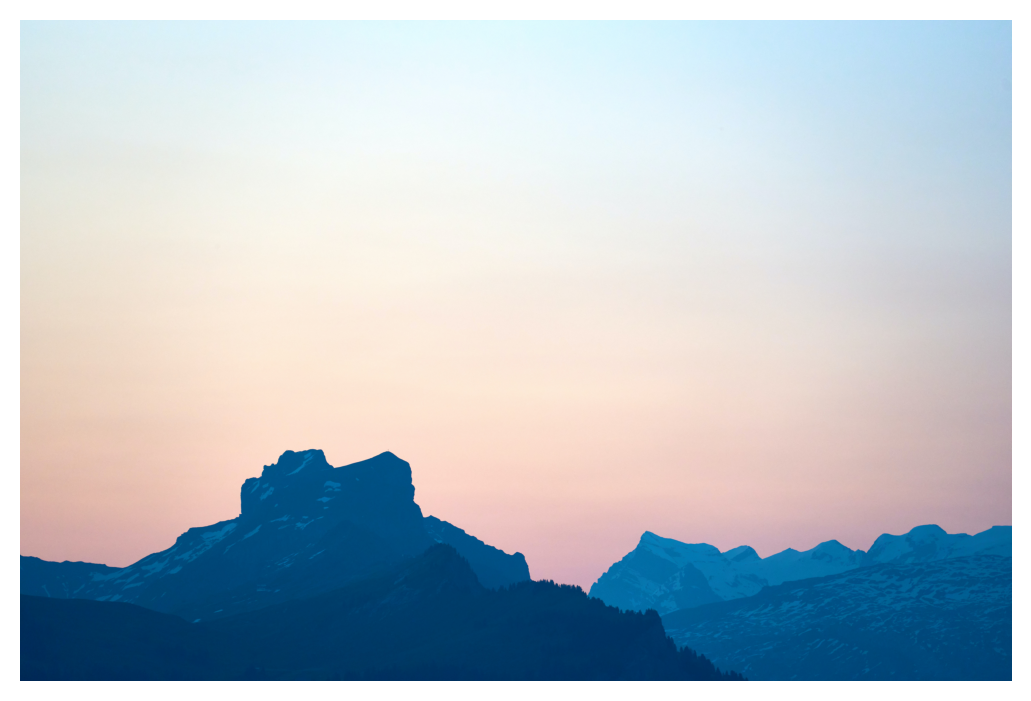

In [10]:
img = plt.imread('image2.jpg')
plt.axis("off")
plt.imshow(img)

In [8]:
import cv2

In [ ]:
print("openCv Version",cv2.__version__)
image=cv2.imread('image2.jpg')
cv2.imshow("opencv",image)
cv2.waitKey(0)
cv2.destroyAllwindows()


openCv Version 4.7.0


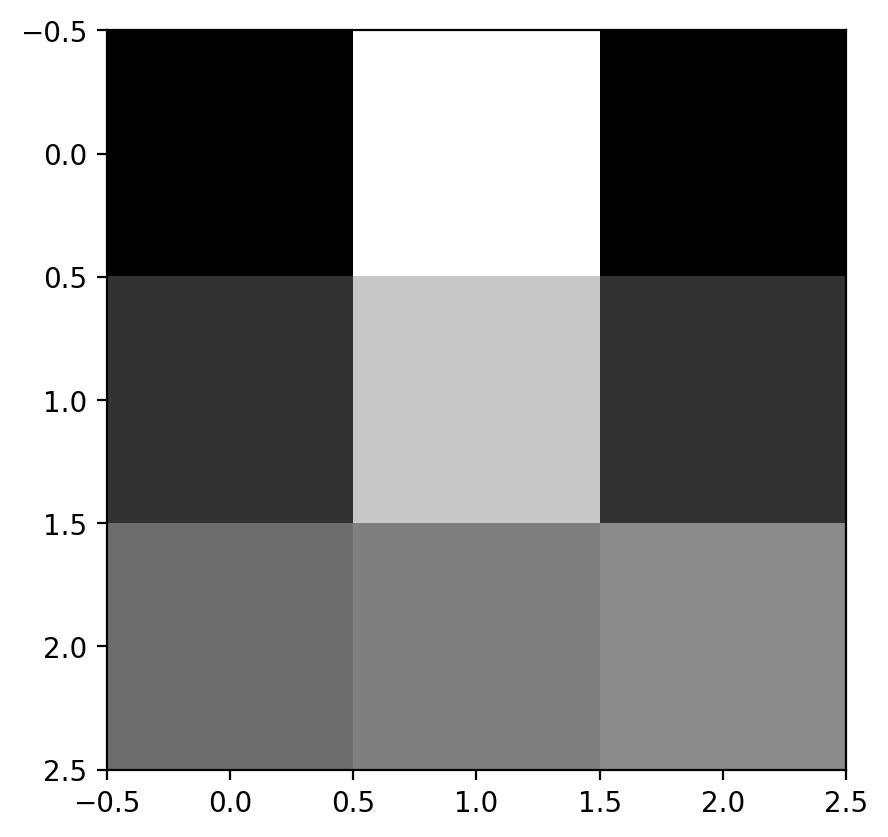

In [3]:
# Make an grayscale image using 3*3 matrix

import pandas as pd
import numpy as np
img = np.array([[    0,255,0],      #black, white, black
               [   50,200,50],       #mid-black, white, dark
               [110,127,140]])   #mid-dark, mid,  mid-light

plt.imshow(img, cmap='gray')

In [31]:
print(img)

[[  0 255   0]
 [ 50 200  50]
 [110 127 140]]


In [32]:
type(img[0,0])

numpy.int64

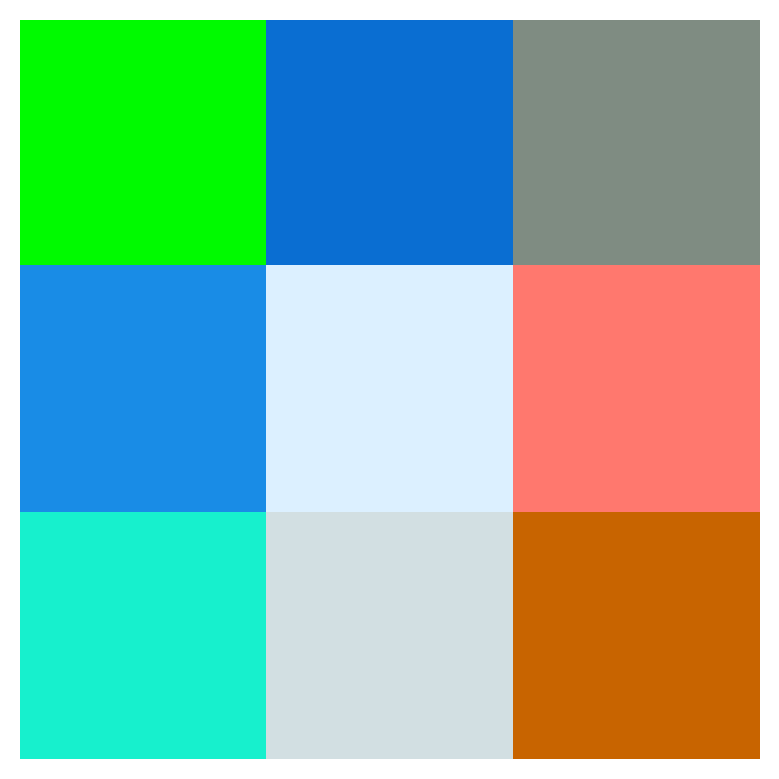

In [4]:
# Now let's create simple 3*3 RGB image.
# This time each pixel is an [R,G,B] triad. 

image = np.array([[[0,250,0],[10,110,210], [127, 140, 130]],
                 [[ 25, 140, 230], [220, 240, 255], [255,120,110]],
                  [[23,240,205], [210,223,226], [200,100,0]]])
plt.axis("off")
plt.imshow(image)

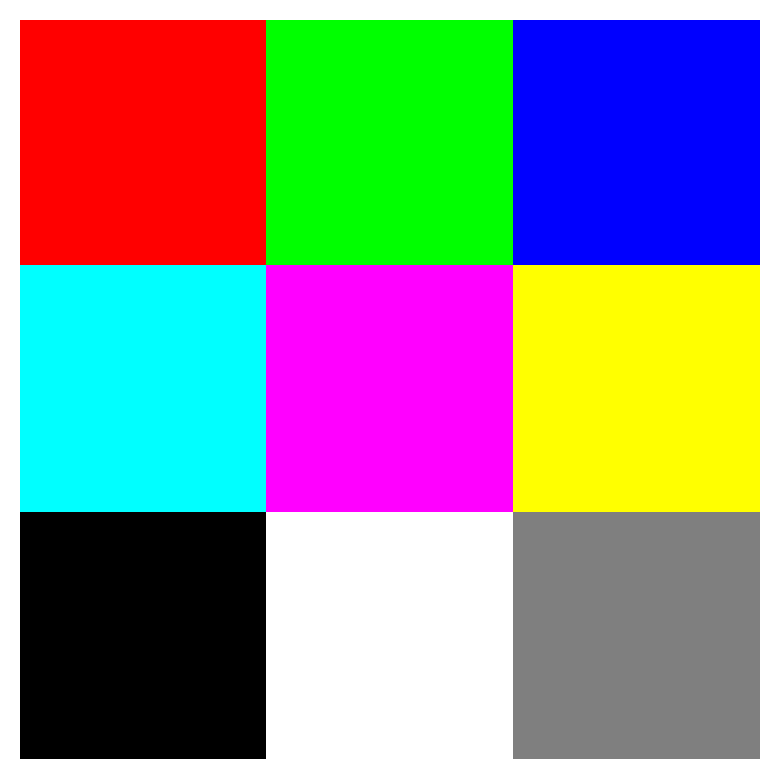

In [5]:
# Now let's create simple 3*3 RGB image.
# This time each pixel is an [R,G,B] triad. 

image1 = np.array([[[255,0,0],[0,255,0], [0,0,255]],                 #Red, Green, Blue 
                 [[ 0, 255, 255], [255, 0, 255], [255,255,0]],      #Cyan, Magenta, yellow
                  [[0,0,0], [255,255,255], [127,127,127]]])         #Black, White, Gray 50%
plt.axis("off")
plt.imshow(image1)

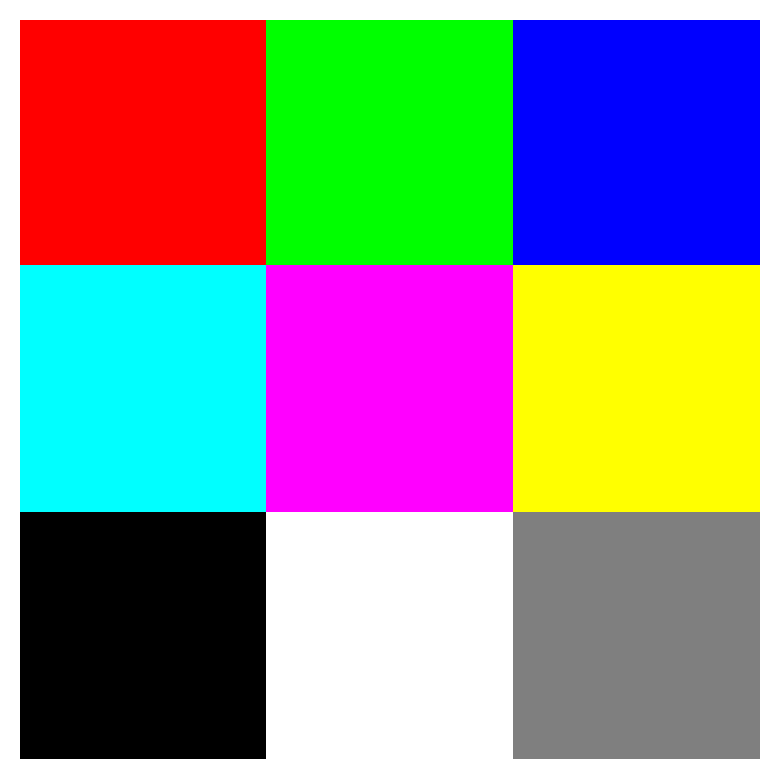

In [6]:
# Now let's create same image with floating point numbers.  


image2 = np.array([[[1,0,0],[0,1,0], [0,0,1]],                 #Red, Green, Blue 
                 [[ 0, 1, 1], [1, 0, 1], [1.0,1,0]],      #Cyan, Magenta, yellow
                  [[0,0,0], [1,1,1], [0.5,0.5,0.5]]])         #Black, White, Gray 50%
plt.axis("off")
plt.imshow(image2)

In [7]:
print(image2)
type(image2[0,0,0])

[[[1.  0.  0. ]
  [0.  1.  0. ]
  [0.  0.  1. ]]

 [[0.  1.  1. ]
  [1.  0.  1. ]
  [1.  1.  0. ]]

 [[0.  0.  0. ]
  [1.  1.  1. ]
  [0.5 0.5 0.5]]]


numpy.float64

### Color Encoding 

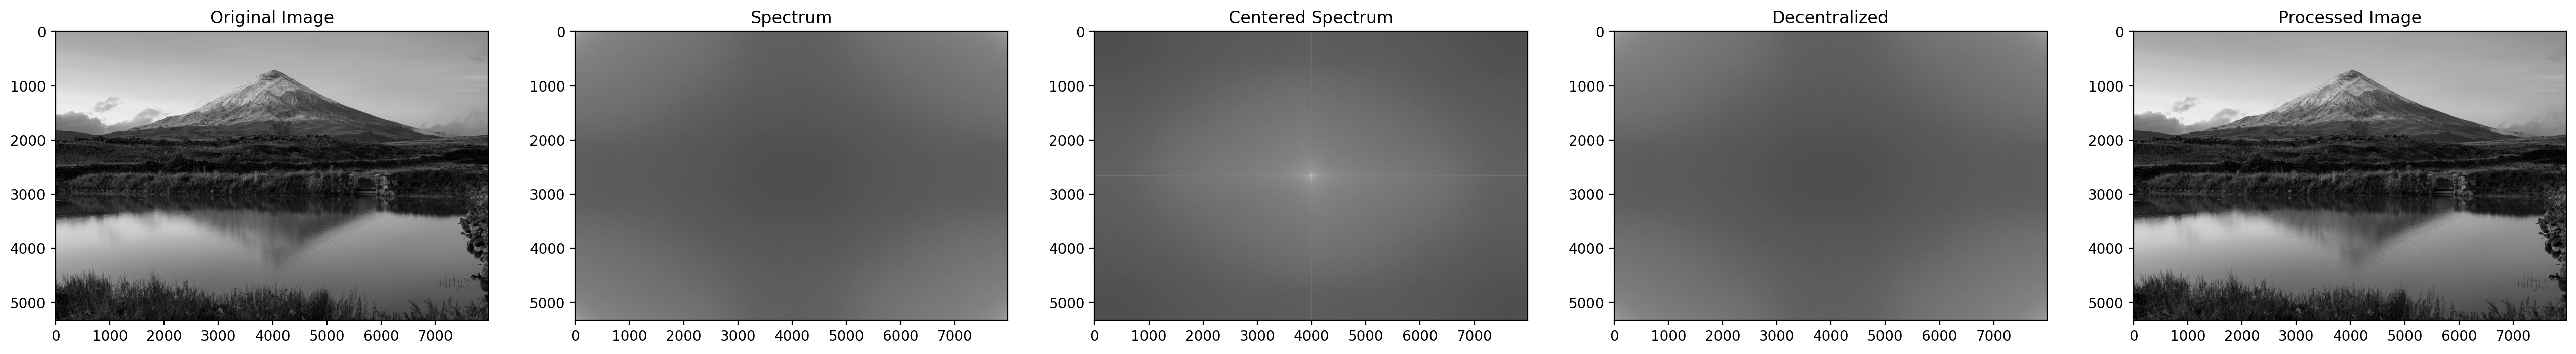

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img_c1 = cv2.imread("image1.jpg", 0)
img_c2 = np.fft.fft2(img_c1)
img_c3 = np.fft.fftshift(img_c2)
img_c4 = np.fft.ifftshift(img_c3)
img_c5 = np.fft.ifft2(img_c4)

plt.subplot(151), plt.imshow(img_c1, "gray"), plt.title("Original Image")
plt.subplot(152), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Spectrum")
plt.subplot(153), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")
plt.subplot(154), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")
plt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")

plt.show()

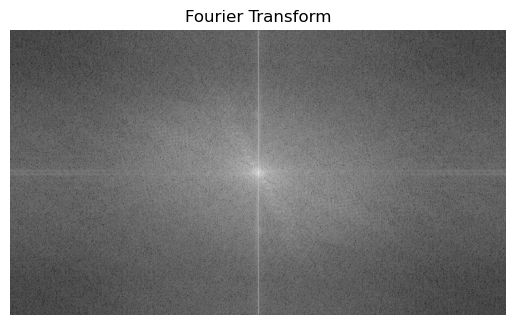

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("Dhoni-dive_165121_730x419-m.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Compute the discrete Fourier Transform of the image
fourier = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero-frequency component to the center of the spectrum
fourier_shift = np.fft.fftshift(fourier)

# Calculate the magnitude of the Fourier Transform
magnitude = 20 * np.log(cv2.magnitude(fourier_shift[:, :, 0], fourier_shift[:, :, 1]))

# Scale the magnitude for display
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

# Display the magnitude of the Fourier Transform using matplotlib
plt.imshow(magnitude, cmap='gray')
plt.title('Fourier Transform')
plt.axis('off')  # Turn off axis labels
plt.show()


In [12]:
from PIL import Image
 
# Location of the image
img = Image.open("image2.jpg")
 
# mode of the image
print(img.mode)

RGB


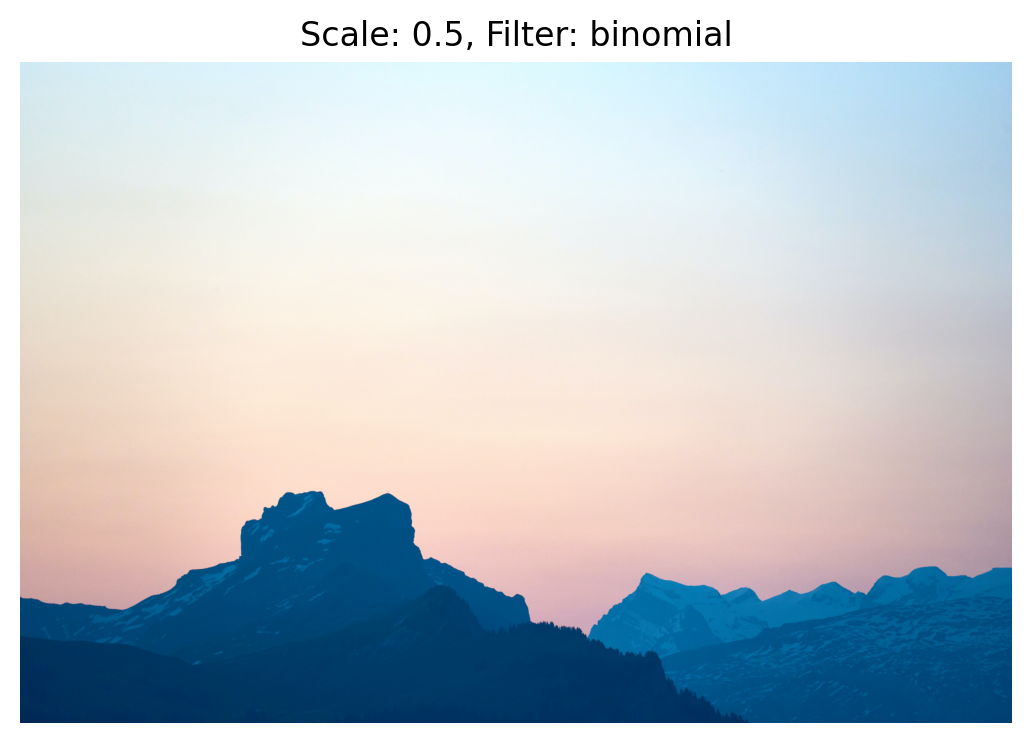

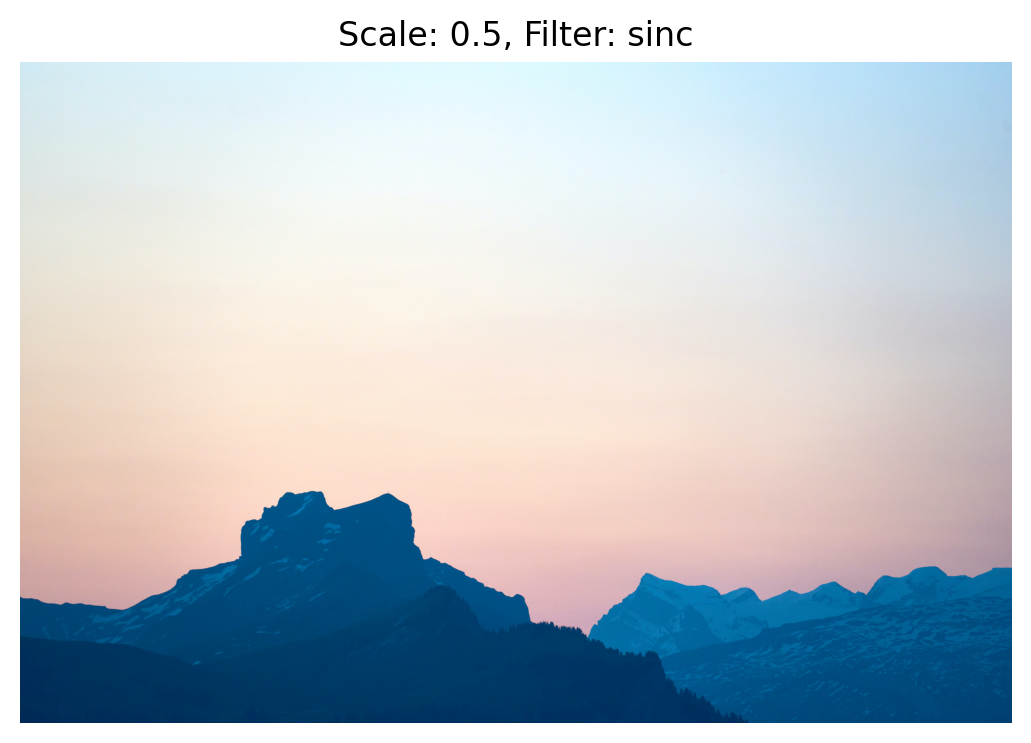

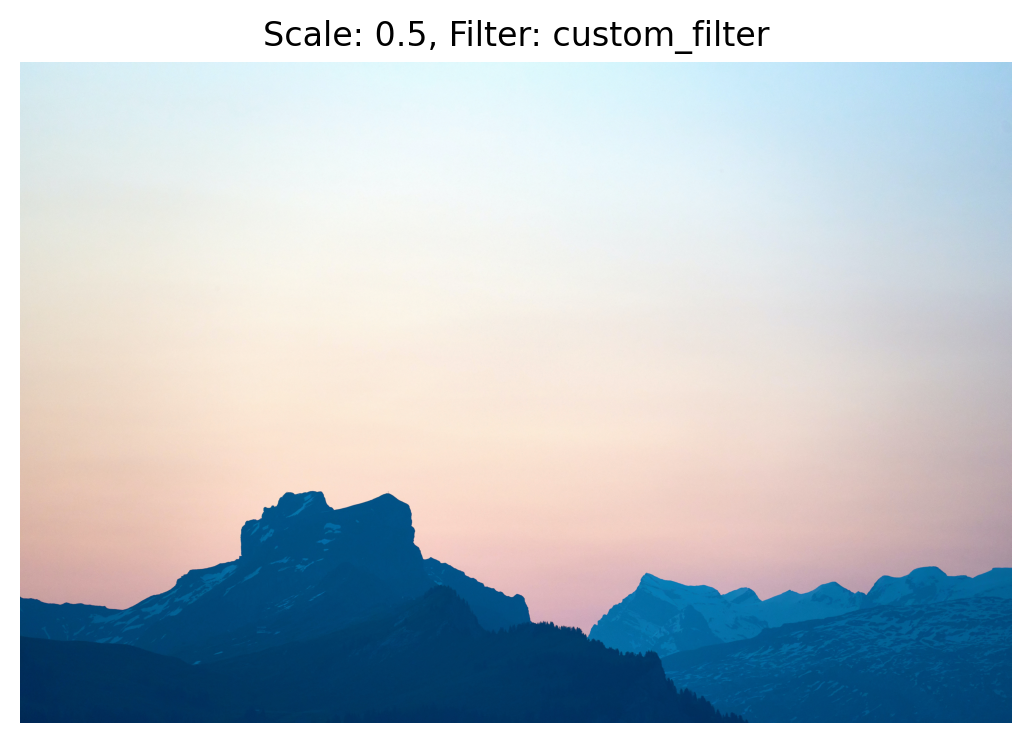

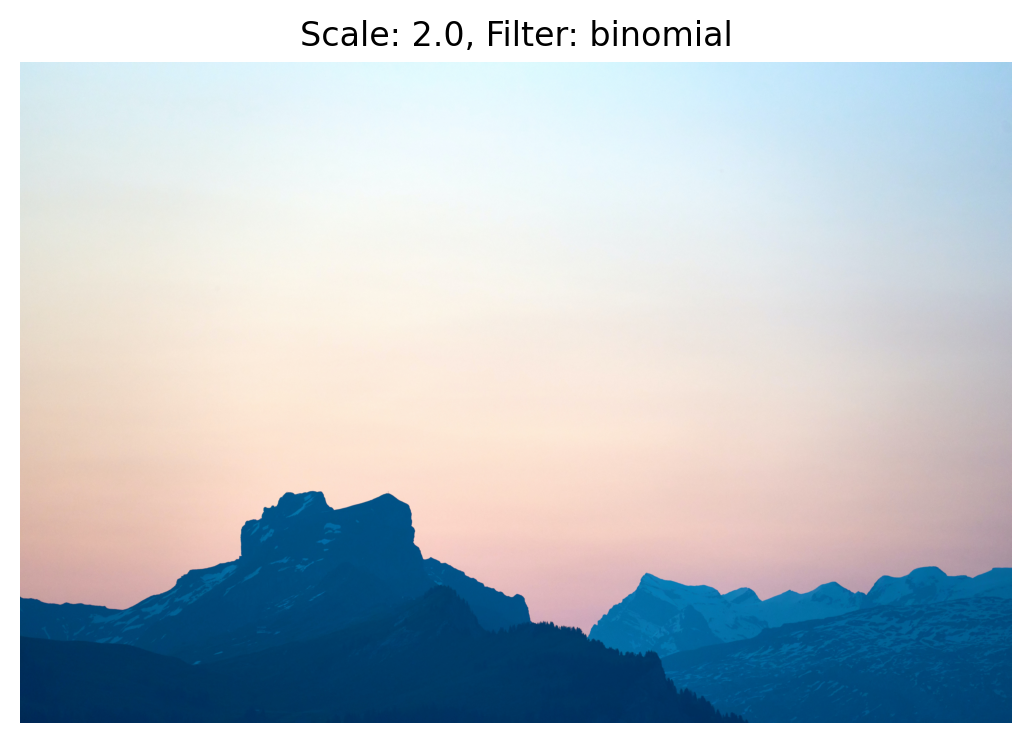

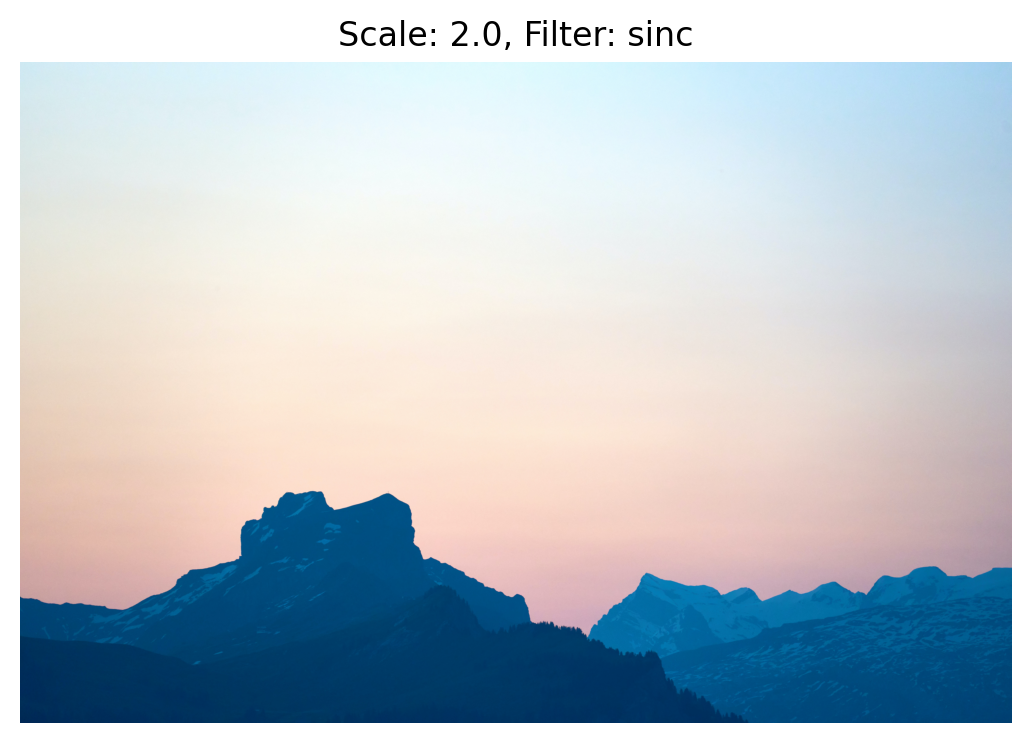

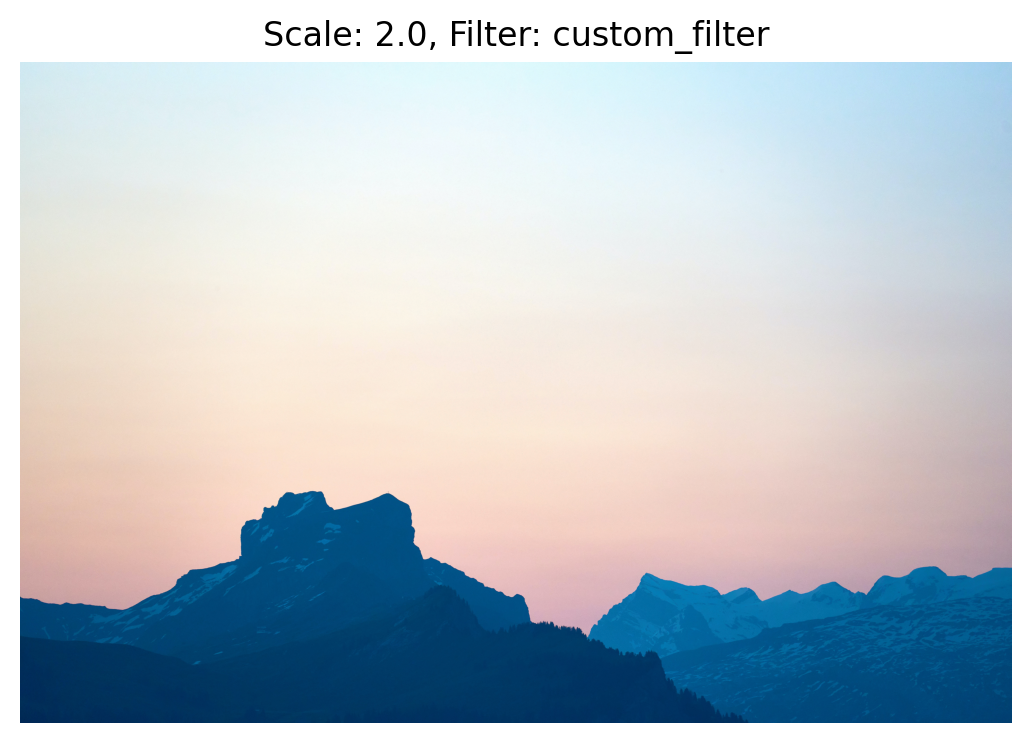

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

def sinc(x):
    if x == 0:
        return 1.0
    else:
        return np.sin(np.pi * x) / (np.pi * x)

def resize_image(image, scale_factor, filter_type):
    if filter_type == 'binomial':
        kernel = np.array([1, 4, 6, 4, 1]) / 16
    elif filter_type == 'sinc':
        kernel_size = 5  # Adjust kernel size as needed
        half_kernel = kernel_size // 2
        kernel = np.zeros((kernel_size, kernel_size), dtype=float)
        for i in range(kernel_size):
            for j in range(kernel_size):
                x = (i - half_kernel) / scale_factor
                y = (j - half_kernel) / scale_factor
                kernel[i, j] = sinc(x) * sinc(y)
        kernel /= np.sum(kernel)
    elif filter_type == 'custom_filter':
        # Implement your custom filter kernel here
        kernel = np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]], dtype=float)
        kernel /= np.sum(kernel)
    else:
        raise ValueError("Invalid filter type")

    new_size = (int(image.shape[1] * scale_factor), int(image.shape[0] * scale_factor))
    resized_image = cv2.filter2D(image, -1, kernel)
    return resized_image

def main():
    original_image = cv2.imread('image2.jpg')  # Load your input image here
    scale_factors = [0.5, 2.0]  # Example scaling factors for downscaling and upscaling
    filter_types = ['binomial', 'sinc', 'custom_filter']  # Example filter types
    
    images = []
    titles = []

    for scale_factor in scale_factors:
        for filter_type in filter_types:
            resized_image = resize_image(original_image.copy(), scale_factor, filter_type)
            images.append(resized_image)
            titles.append(f'Scale: {scale_factor}, Filter: {filter_type}')

    for image, title in zip(images, titles):
        plt.figure()
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
        plt.show()

if __name__ == "__main__":
    main()
